In [3]:
from __future__ import annotations

import datasets

datasets_list = [
    datasets.load_dataset("nimashoghi/mptrj", split=split, streaming=True)
    for split in ["train", "val", "test"]
]
datasets_list

[IterableDataset({
     features: ['numbers', 'positions', 'forces', 'cell', 'pbc', 'energy', 'stress', 'e_per_atom_relaxed', 'mp_id', 'energy_per_atom', 'ef_per_atom_relaxed', 'corrected_total_energy', 'ef_per_atom', 'task_id', 'calc_id', 'ionic_step', 'filename', 'extxyz_id', 'num_atoms', 'corrected_total_energy_relaxed', 'energy_referenced', 'corrected_total_energy_referenced', 'corrected_total_energy_relaxed_referenced', 'composition'],
     n_shards: 8
 }),
 IterableDataset({
     features: ['numbers', 'positions', 'forces', 'cell', 'pbc', 'energy', 'stress', 'e_per_atom_relaxed', 'mp_id', 'energy_per_atom', 'ef_per_atom_relaxed', 'corrected_total_energy', 'ef_per_atom', 'task_id', 'calc_id', 'ionic_step', 'filename', 'extxyz_id', 'num_atoms', 'corrected_total_energy_relaxed', 'energy_referenced', 'corrected_total_energy_referenced', 'corrected_total_energy_relaxed_referenced', 'composition'],
     n_shards: 1
 }),
 IterableDataset({
     features: ['numbers', 'positions', 'forces

In [5]:
from tqdm import tqdm

ids = set()

natoms = []
atomic_numbers = []

for dataset in datasets_list:
    for data_dict in tqdm(dataset):
        id = data_dict["mp_id"]
        if id in ids:
            continue

        ids.add(id)
        natoms.append(data_dict["num_atoms"])
        atomic_numbers.append(data_dict["numbers"])


0it [00:00, ?it/s]

1559916it [22:00, 1180.90it/s]
10206it [00:07, 1300.47it/s]
10273it [00:06, 1490.23it/s]


In [6]:
import pickle

with open("/mnt/shared/jmp-wbm-embeddings-omat/mptrj-natoms.pkl", "wb") as f:
    pickle.dump(natoms, f)

with open("/mnt/shared/jmp-wbm-embeddings-omat/mptrj-atomic_numbers.pkl", "wb") as f:
    pickle.dump(atomic_numbers, f)


/tmp/ipykernel_2800518/4224466403.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_atomic_symbols, rotation=90)


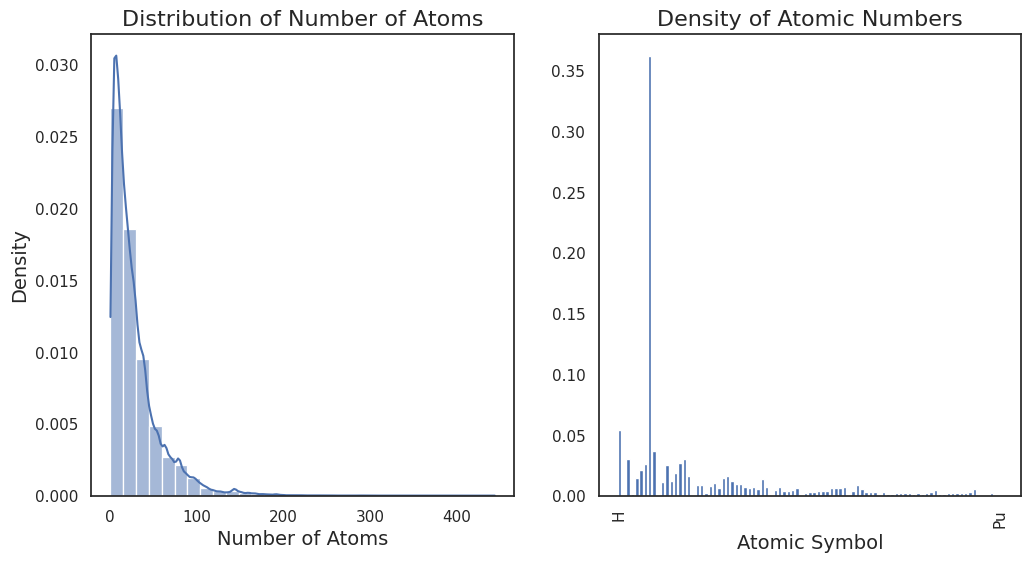

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ase.data import chemical_symbols

# Set the aesthetic style of the plots
sns.set_theme(style="white")

# Create a figure and an axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes = axes.flatten()

# Create the histogram on the ax object
ax = axes[0]
sns.histplot(natoms, bins=30, kde=True, stat="density", ax=ax)

# Add titles and labels
ax.set_title("Distribution of Number of Atoms", fontsize=16)
ax.set_xlabel("Number of Atoms", fontsize=14)
ax.set_ylabel("Density", fontsize=14)

# Now, create the histogram for the atomic numbers
ax = axes[1]
atomic_numbers_flat = np.concatenate(atomic_numbers)
# Create a mapping from atomic number to symbol
atomic_number_to_symbol = {num: symbol for num, symbol in enumerate(chemical_symbols)}
# Manually compute the density of each atomic number
unique_atomic_numbers, counts = np.unique(atomic_numbers_flat, return_counts=True)
densities = counts / len(atomic_numbers_flat)

# Sort the atomic numbers and densities by atomic number
sorted_indices = np.argsort(unique_atomic_numbers)
sorted_atomic_numbers = unique_atomic_numbers[sorted_indices]
sorted_densities = densities[sorted_indices]

# Convert atomic numbers to symbols
sorted_atomic_symbols = [atomic_number_to_symbol[num] for num in sorted_atomic_numbers]

# Plot the barplot with atomic symbols on the x-axis
ax.bar(sorted_atomic_symbols, sorted_densities)

# Add titles and labels
ax.set_title("Density of Atomic Numbers", fontsize=16)
ax.set_xlabel("Atomic Symbol", fontsize=14)
# ax.set_ylabel("Density", fontsize=14)
ax.set_xticklabels(sorted_atomic_symbols, rotation=90)

# Show only the labels for the first and last atomic number
ax.set_xticks([0, len(sorted_atomic_symbols) - 1])
ax.set_xticklabels([sorted_atomic_symbols[0], sorted_atomic_symbols[-1]])

# Save to pdf
plt.savefig("distribution_of_atoms_and_atomic_numbers.pdf")

# Show the plot
plt.show()


In [43]:
from __future__ import annotations

import datasets

datasets_list_wbm = [
    datasets.load_dataset("nimashoghi/wbm", split="train", streaming=True)
]
datasets_list_wbm

[IterableDataset({
     features: ['formula', 'n_sites', 'volume', 'uncorrected_energy', 'e_form_per_atom_wbm', 'e_above_hull_wbm', 'bandgap_pbe', 'wyckoff_spglib_initial_structure', 'uncorrected_energy_from_cse', 'e_correction_per_atom_mp2020', 'e_correction_per_atom_mp_legacy', 'e_form_per_atom_uncorrected', 'e_form_per_atom_mp2020_corrected', 'e_above_hull_mp2020_corrected_ppd_mp', 'site_stats_fingerprint_init_final_norm_diff', 'wyckoff_spglib', 'unique_prototype', 'formula_from_cse', 'initial_structure', 'id', 'material_id', 'frac_pos', 'cart_pos', 'pos', 'cell', 'num_atoms', 'atomic_numbers', 'composition'],
     n_shards: 2
 })]

In [45]:
from tqdm import tqdm

ids = set()

natoms_wbm = []
atomic_numbers_wbm = []

for dataset in datasets_list_wbm:
    for data_dict in tqdm(dataset):
        id = data_dict["material_id"]
        if id in ids:
            continue

        ids.add(id)
        natoms_wbm.append(data_dict["num_atoms"])
        atomic_numbers_wbm.append(data_dict["atomic_numbers"])


0it [00:00, ?it/s]

256963it [03:22, 1269.13it/s]


In [46]:
import pickle

with open("/mnt/shared/jmp-wbm-embeddings-omat/wbm-natoms.pkl", "wb") as f:
    pickle.dump(natoms_wbm, f)

with open("/mnt/shared/jmp-wbm-embeddings-omat/wbm-atomic_numbers.pkl", "wb") as f:
    pickle.dump(atomic_numbers_wbm, f)


/tmp/ipykernel_2800518/125799544.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_atomic_symbols, rotation=90)


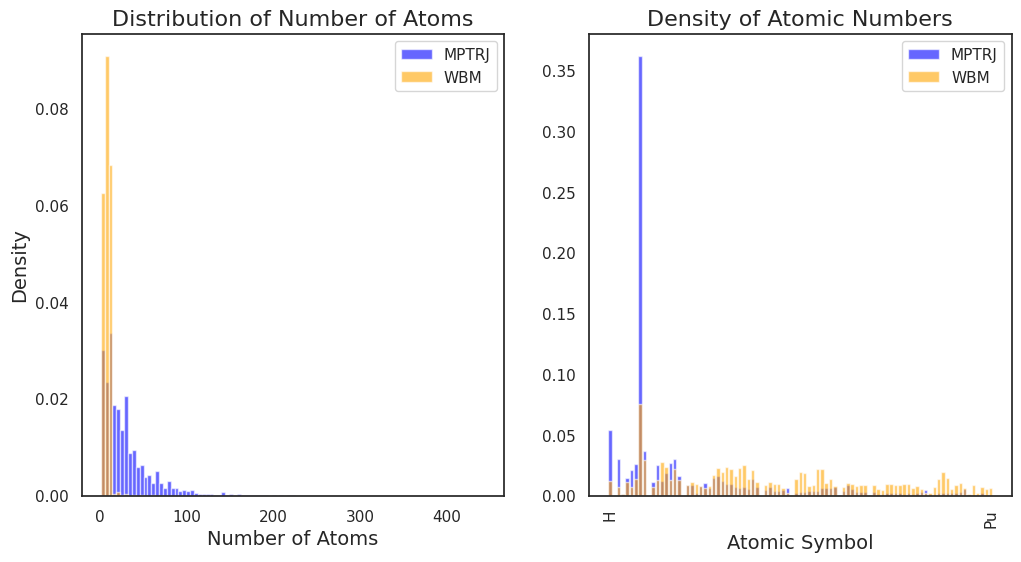

In [51]:
# Create a figure and an axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes = axes.flatten()

# Create the histogram on the ax object for natoms
ax = axes[0]

# Manually compute the histograms for both datasets
bins = np.linspace(
    min(min(natoms), min(natoms_wbm)), max(max(natoms), max(natoms_wbm)), 100
)
counts_mptrj, _ = np.histogram(natoms, bins=bins, density=True)
counts_wbm, _ = np.histogram(natoms_wbm, bins=bins, density=True)

# Plot the histograms
ax.bar(
    bins[:-1],
    counts_mptrj,
    width=np.diff(bins),
    color="blue",
    alpha=0.6,
    label="MPTRJ",
    align="edge",
)
ax.bar(
    bins[:-1],
    counts_wbm,
    width=np.diff(bins),
    color="orange",
    alpha=0.6,
    label="WBM",
    align="edge",
)

# Add titles and labels
ax.set_title("Distribution of Number of Atoms", fontsize=16)
ax.set_xlabel("Number of Atoms", fontsize=14)
ax.set_ylabel("Density", fontsize=14)
ax.legend()

# Now, create the histogram for the atomic numbers
ax = axes[1]
atomic_numbers_flat = np.concatenate(atomic_numbers)
atomic_numbers_wbm_flat = np.concatenate(atomic_numbers_wbm)

# Create a mapping from atomic number to symbol
atomic_number_to_symbol = {num: symbol for num, symbol in enumerate(chemical_symbols)}

# Manually compute the density of each atomic number for both datasets
unique_atomic_numbers, counts = np.unique(atomic_numbers_flat, return_counts=True)
densities = counts / len(atomic_numbers_flat)

unique_atomic_numbers_wbm, counts_wbm = np.unique(
    atomic_numbers_wbm_flat, return_counts=True
)
densities_wbm = counts_wbm / len(atomic_numbers_wbm_flat)

# Sort the atomic numbers and densities by atomic number
sorted_indices = np.argsort(unique_atomic_numbers)
sorted_atomic_numbers = unique_atomic_numbers[sorted_indices]
sorted_densities = densities[sorted_indices]

sorted_indices_wbm = np.argsort(unique_atomic_numbers_wbm)
sorted_atomic_numbers_wbm = unique_atomic_numbers_wbm[sorted_indices_wbm]
sorted_densities_wbm = densities_wbm[sorted_indices_wbm]

# Convert atomic numbers to symbols
sorted_atomic_symbols = [atomic_number_to_symbol[num] for num in sorted_atomic_numbers]
sorted_atomic_symbols_wbm = [
    atomic_number_to_symbol[num] for num in sorted_atomic_numbers_wbm
]

# Plot the barplot with atomic symbols on the x-axis
ax.bar(sorted_atomic_symbols, sorted_densities, color="blue", alpha=0.6, label="MPTRJ")
ax.bar(
    sorted_atomic_symbols_wbm,
    sorted_densities_wbm,
    color="orange",
    alpha=0.6,
    label="WBM",
)

# Add titles and labels
ax.set_title("Density of Atomic Numbers", fontsize=16)
ax.set_xlabel("Atomic Symbol", fontsize=14)
ax.set_xticklabels(sorted_atomic_symbols, rotation=90)
ax.legend()

# Show only the labels for the first and last atomic number
ax.set_xticks([0, len(sorted_atomic_symbols) - 1])
ax.set_xticklabels([sorted_atomic_symbols[0], sorted_atomic_symbols[-1]])

# Save to pdf
plt.savefig("distribution_of_atoms_and_atomic_numbers_with_wbm.pdf")

# Show the plot
plt.show()
